In [1]:
import os
import sys

import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from pyHalo.preset_models import CDM
from hydra import initialize, compose
from pyHalo.Cosmology.cosmology import Cosmology
import astropy.cosmology as astropy_cosmo
import traceback

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import diagnostic_plot, plot
from mejiro.lenses.lens import Lens
from mejiro.lenses.test import TestLens
from mejiro.helpers import pyhalo
from mejiro.utils import util

np.random.seed(config.seed)

In [2]:
lens = TestLens()

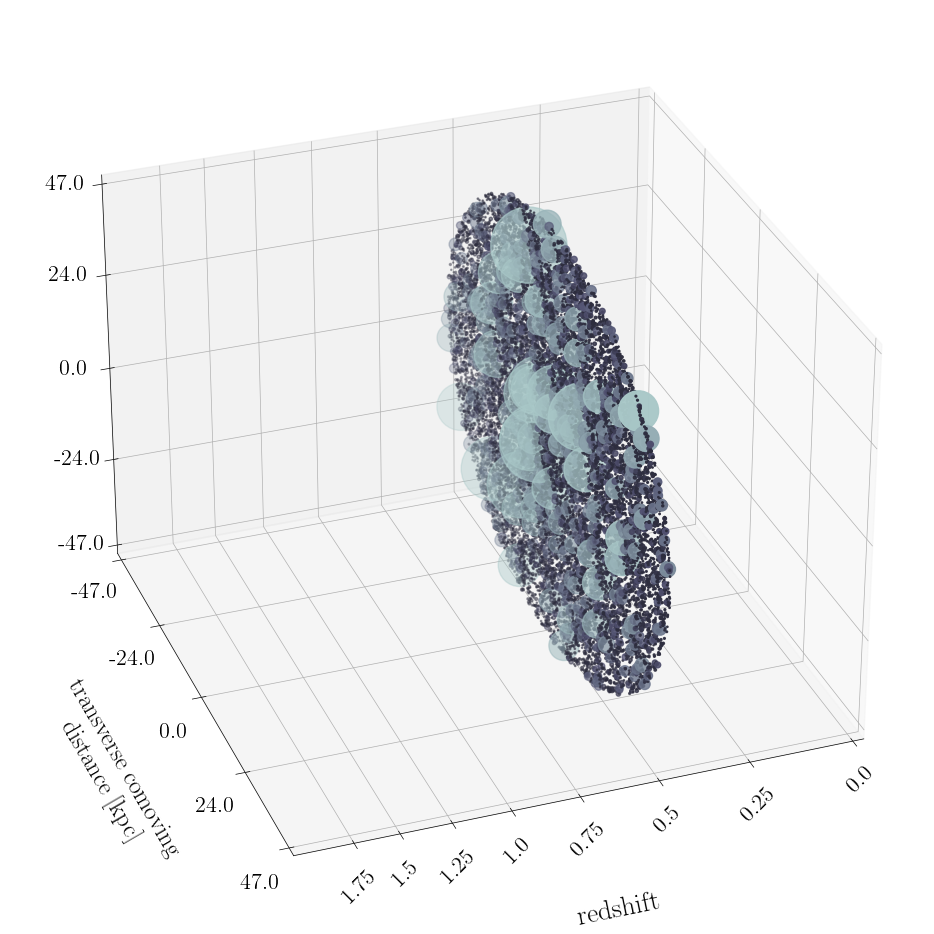

In [3]:
realizationCDM = CDM(z_lens=0.5, z_source=2., cone_opening_angle_arcsec=11, LOS_normalization=0.0)

fig = plt.figure(2)
fig.set_size_inches(14,12)
ax = plt.subplot(111, projection='3d')
realizationCDM.plot(ax)

In [4]:
lens_dict = {}
for band in util.hydra_to_dict(config.pipeline)['band']:
    # open pickled lens list
    lens_list = util.unpickle(os.path.join(pickle_dir, f'01_skypy_output_lens_list_{band.lower()}'))
    lens_dict[band] = lens_list

In [5]:
failed_pairs = []

In [6]:
for lens in lens_list:
    print(lens.z_source, lens.z_lens)

1.284746146716405 0.8272271198859346
0.4182020644474263 0.29985199066183404
1.4524361862002524 0.5821427200834395
0.8916720706322018 0.34815745320445707
1.2304326933632517 0.37256654269631556
1.028759843619721 0.30102356915894163
0.9057200350102335 0.226966583607963
1.4352814437222543 0.226966583607963
0.815170454412868 0.4943953984105125
0.6227268983840378 0.288673849836854
1.9433557386688731 0.44811105879231306
0.6649057123893963 0.4564411415343113
1.1490355998075652 0.7389418228272407
0.8336105179015058 0.6146736844477723
1.1024275397635823 0.39439426228233415
0.7995144738396887 0.49803394791225547
0.43684270268925474 0.2984607375987491
1.2290802528467506 0.5216865140912298
0.5031103075454425 0.3351635851186062
1.0572763990882221 0.5485059563126853
0.9070557224289127 0.4193341489775717
0.9046954347404359 0.3677700231007972
1.2527172200291266 0.4248358312266848
1.3699532738908005 0.4248358312266848
1.4135694908233745 0.43967218842274414
1.4675174460442977 0.7124538176557719
1.6652157

In [7]:
for lens in tqdm(lens_list[:30]):
    try:
        lens.add_subhalos(*pyhalo.generate_CDM_halos(lens.z_lens, lens.z_source, cone_opening_angle_arcsec=11., LOS_normalization=0.)) 
    except:
        print(traceback.format_exc())
        failed_pairs.append((lens.z_lens, lens.z_source))

 13%|█▎        | 4/30 [01:16<07:02, 16.27s/it]

Traceback (most recent call last):
  File "/tmp/ipykernel_1610/2714141907.py", line 3, in <cell line: 1>
    lens.add_subhalos(*pyhalo.generate_CDM_halos(lens.z_lens, lens.z_source, cone_opening_angle_arcsec=11., LOS_normalization=0.))
  File "/nfshome/bwedig/mejiro/mejiro/helpers/pyhalo.py", line 9, in generate_CDM_halos
    realizationCDM = CDM(z_lens, z_source, cone_opening_angle_arcsec=cone_opening_angle_arcsec, LOS_normalization=LOS_normalization)
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/PresetModels/cdm.py", line 141, in CDM
    realization_list = pyhalo.render(population_model_list, mass_function_class_list, kwargs_mass_function_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/pyhalo.py", line 61, in render
    masses, x_arcsec, y_arcsec, r3d, redshifts, subhalo_flag, rendering_classes = self.render_masses_positions(population_model_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHal

 27%|██▋       | 8/30 [01:36<02:58,  8.10s/it]

Traceback (most recent call last):
  File "/tmp/ipykernel_1610/2714141907.py", line 3, in <cell line: 1>
    lens.add_subhalos(*pyhalo.generate_CDM_halos(lens.z_lens, lens.z_source, cone_opening_angle_arcsec=11., LOS_normalization=0.))
  File "/nfshome/bwedig/mejiro/mejiro/helpers/pyhalo.py", line 9, in generate_CDM_halos
    realizationCDM = CDM(z_lens, z_source, cone_opening_angle_arcsec=cone_opening_angle_arcsec, LOS_normalization=LOS_normalization)
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/PresetModels/cdm.py", line 141, in CDM
    realization_list = pyhalo.render(population_model_list, mass_function_class_list, kwargs_mass_function_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/pyhalo.py", line 61, in render
    masses, x_arcsec, y_arcsec, r3d, redshifts, subhalo_flag, rendering_classes = self.render_masses_positions(population_model_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHal

 50%|█████     | 15/30 [02:42<02:08,  8.59s/it]

Traceback (most recent call last):
  File "/tmp/ipykernel_1610/2714141907.py", line 3, in <cell line: 1>
    lens.add_subhalos(*pyhalo.generate_CDM_halos(lens.z_lens, lens.z_source, cone_opening_angle_arcsec=11., LOS_normalization=0.))
  File "/nfshome/bwedig/mejiro/mejiro/helpers/pyhalo.py", line 9, in generate_CDM_halos
    realizationCDM = CDM(z_lens, z_source, cone_opening_angle_arcsec=cone_opening_angle_arcsec, LOS_normalization=LOS_normalization)
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/PresetModels/cdm.py", line 141, in CDM
    realization_list = pyhalo.render(population_model_list, mass_function_class_list, kwargs_mass_function_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/pyhalo.py", line 61, in render
    masses, x_arcsec, y_arcsec, r3d, redshifts, subhalo_flag, rendering_classes = self.render_masses_positions(population_model_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHal

 90%|█████████ | 27/30 [04:53<00:20,  6.91s/it]

Traceback (most recent call last):
  File "/tmp/ipykernel_1610/2714141907.py", line 3, in <cell line: 1>
    lens.add_subhalos(*pyhalo.generate_CDM_halos(lens.z_lens, lens.z_source, cone_opening_angle_arcsec=11., LOS_normalization=0.))
  File "/nfshome/bwedig/mejiro/mejiro/helpers/pyhalo.py", line 9, in generate_CDM_halos
    realizationCDM = CDM(z_lens, z_source, cone_opening_angle_arcsec=cone_opening_angle_arcsec, LOS_normalization=LOS_normalization)
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/PresetModels/cdm.py", line 141, in CDM
    realization_list = pyhalo.render(population_model_list, mass_function_class_list, kwargs_mass_function_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHalo/pyhalo.py", line 61, in render
    masses, x_arcsec, y_arcsec, r3d, redshifts, subhalo_flag, rendering_classes = self.render_masses_positions(population_model_list,
  File "/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pyHal

100%|██████████| 30/30 [05:41<00:00, 11.39s/it]


In [8]:
from pprint import pprint

pprint(failed_pairs)

[(0.37256654269631556, 1.2304326933632517),
 (0.4943953984105125, 0.815170454412868),
 (0.6146736844477723, 0.8336105179015058),
 (0.39439426228233415, 1.1024275397635823),
 (0.7124538176557719, 1.4675174460442977),
 (0.23419222297565145, 1.6652157440176276)]


In [19]:
try:
    realizationCDM = CDM(z_lens=0.37256654269631556, z_source=1.2304326933632517, cone_opening_angle_arcsec=11, LOS_normalization=0.0)
except Exception as e:
    with open('stack_trace.txt', 'w') as f:
        f.write(traceback.format_exc())

In [20]:
realizationCDM = CDM(z_lens=0.37256654269631556, z_source=1.2304326933632517, cone_opening_angle_arcsec=11., LOS_normalization=0.0)

Exception: R = 0.00e+00 is too small (min. R = 1.00e-03)